# 2CSSID-TP07. Réseaux de neurones

Dans ce TP, nous allons voir les réseaux de neurones.
Premierement, nous allons implémenter la rétro-propagation, une fonction d'activation et une fonction du cout.
Ensuite, nous allons tester l'effet de l'initialisation des paramètres, les fonctions d'activation, ainsi que les fonctions d'optimisation.

Binômes : 
- **Binôme 1 :** Tirichine Mohammed
- **Binôme 2 :** Bourzag Mohamed Chakib

## Introduction

Voici un exemple d'un reseau de neurones :

![exemple](RNPA-exp.png)

---

**Afin de mettre à jour** $w_{11}^{(4)}$
$$\frac{\partial J}{\partial w_{11}^{(4)}} = \overbrace{\frac{\partial J}{\partial f_{1}^{(4)}} \frac{\partial f_{1}^{(4)}}{\partial z_{1}^{(4)}}}^{\delta_{1}^{(4)}} \overbrace{\frac{\partial z_{1}^{(4)}}{\partial w_{11}^{(4)}}}^{a_{1}^{(3)}}$$

$$\frac{\partial J}{\partial f_{1}^{(4)}} = \frac{(0.840, 0.843) - (0, 1)}{(0.840, 0.843) - (0.840, 0.843)^2} 
= (6.25, -1.186)$$

$$\frac{\partial f_{1}^{(4)}}{\partial z_{1}^{(4)}} = (0.840, 0.843) (0.160, 0.157) = (0.134, 0.132)$$

$$\delta_{1}^{(4)} = (6.25, -1.186) (0.134, 0.132) \approx (0.838, -0.157)$$

$$\frac{\partial J}{\partial w_{11}^{(4)}} = moy((0.838, -0.157) (0.555, 0.612)) 
\approx moy(0.465, -0.096) = 0.184$$

---

**Afin de mettre à jour** $w_{21}^{(4)}$

$$\frac{\partial J}{\partial w_{21}^{(4)}} = \overbrace{\frac{\partial J}{\partial f_{1}^{(4)}} \frac{\partial f_{1}^{(4)}}{\partial z_{1}^{(4)}}}^{\delta_{1}^{(4)}} \overbrace{\frac{\partial z_{1}^{(4)}}{\partial w_{21}^{(4)}}}^{a_{2}^{(3)}}$$

$$\delta_{1}^{(4)} = (0.838, -0.157)$$

$$\frac{\partial J}{\partial w_{21}^{(4)}} = moy((0.838, -0.157) (0.386, 0.360)) 
\approx moy(0.323, -0.056) = 0.134$$

---

**Afin de mettre à jour** $w_{11}^{(3)}$

$$\frac{\partial J}{\partial w_{11}^{(3)}} = 
\overbrace{
	\overbrace{
		\frac{\partial J}{\partial f_{1}^{(4)}} 
		\frac{\partial f_{1}^{(4)}}{\partial z_{1}^{(4)}}
	}^{\delta_{1}^{(4)}} 
	\overbrace{
		\frac{\partial z_{1}^{(4)}}{\partial f_{1}^{(3)}}
	}^{w_{11}^{(4)}} 
	\frac{\partial f_{1}^{(3)}}{\partial z_{1}^{(3)}} 
}^{\delta_{1}^{(3)}} 
\overbrace{
	\frac{\partial z_{1}^{(3)}}{\partial w_{11}^{(3)}}
}^{a_{1}^{(2)}}
\text{ Ici, on utilise l'ancien } w_{11}^{(4)}$$

$$\frac{\partial f_{1}^{(3)}}{\partial z_{1}^{(3)}} \approx 
(0.555, 0.612) (0.445, 0.388) = (0.247, 0.237)$$

$$\delta_{1}^{(3)} = (0.838, -0.157) * 0.7 * (0.247, 0.237) \approx (0.145, -0.026)$$

$$\frac{\partial J}{\partial w_{11}^{(2)}} = moy((0.145, -0.026) (0.622, 0.900)) 
= moy(0.090, -0.023) = 0.033$$

---

**Afin de mettre à jour** $w_{12}^{(3)}$

$$\frac{\partial J}{\partial w_{12}^{(3)}} = 
\overbrace{
	\overbrace{
		\frac{\partial J}{\partial f_{1}^{(4)}} 
		\frac{\partial f_{1}^{(4)}}{\partial z_{1}^{(4)}}
	}^{\delta_{1}^{(4)}} 
	\overbrace{
		\frac{\partial z_{1}^{(4)}}{\partial f_{2}^{(3)}}
	}^{w_{11}^{(4)}} 
	\frac{\partial f_{2}^{(3)}}{\partial z_{2}^{(3)}} 
}^{\delta_{2}^{(3)}} 
\overbrace{
	\frac{\partial z_{2}^{(3)}}{\partial w_{12}^{(3)}}
}^{a_{1}^{(2)}}
\text{ Ici, on utilise l'ancien } w_{12}^{(4)}$$

$$\frac{\partial f_{2}^{(3)}}{\partial z_{2}^{(3)}} \approx 
(0.386, 0.360) (0.614, 0.64) = (0.237, 0.230)$$

$$\delta_{2}^{(3)} = (0.838, -0.157) * 0.7 * (0.237, 0.230) \approx (0.139, -0.025)$$

$$\frac{\partial J}{\partial w_{11}^{(2)}} = moy((0.139, -0.025) (0.622, 0.900)) 
= moy(0.086, -0.023) = 0.032$$

---

**Afin de mettre à jour** $w_{11}^{(2)}$

$$\frac{\partial J}{\partial w_{11}^{(2)}} = 
\overbrace{ 
\left(
	\delta_{1}^{(3)} 
	\overbrace{
		\frac{\partial z_{1}^{(3)}}{\partial f_{1}^{(2)}}
	}^{w_{11}^{(3)}}
	+
	\delta_{2}^{(3)} 
	\overbrace{
		\frac{\partial z_{2}^{(3)}}{\partial f_{1}^{(2)}}
	}^{w_{12}^{(3)}}
\right)
\frac{\partial f_{1}^{(2)}}{\partial z_{1}^{(2)}}
}^{\delta_{1}^{(2)}} 
\overbrace{
	\frac{\partial z_{1}^{(2)}}{\partial w_{11}^{(2)}}
}^{a_{1}^{(1)}}$$

$$\frac{\partial f_{1}^{(2)}}{\partial z_{1}^{(2)}} = (0.622, 0.900) (0.378, 0.100) = (0.235, 0.09)$$

$$\delta_{1}^{(2)} = \left((0.145, -0.026) * (0.3) + (0.139, -0.025) * (-0.1)\right) * (0.235, 0.09) \approx (0.006956, -0.00047683)$$

---

**Cas general**

On calcule les $\delta^{(l)}$ où $l$ est le numéro de la couche

$$\delta^{(sortie)} = 
\frac{\partial J}{\partial f^{(sortie)}} \frac{\partial f^{(sortie)}}{\partial z^{(sortie)}}
\,,\,
\delta^{(l)} = \frac{\partial f^{(l)}}{\partial z^{(l)}} w^{(l+1)} \delta^{(l+1)}$$

On calcule les gradients

$$\frac{\partial J}{\partial w^{(l)}} = a^{(l-1)} \delta^{(l)}
\,,\,
\frac{\partial J}{\partial b^{(l)}} = \delta^{(l)}$$

On met à jour les paramètres

$$w = w - \alpha \frac{\partial J}{\partial w^{(l)}}
\,,\,
b = b - \alpha \frac{\partial J}{\partial b^{(l)}}$$

In [1]:
import matplotlib
import numpy             as np
import pandas            as pd 
import matplotlib.pyplot as plt 
from matplotlib      import colors 
%matplotlib inline

np.__version__, pd.__version__, matplotlib.__version__

('1.26.2', '2.1.4', '3.8.2')

In [2]:
from typing          import Tuple, List, Type, Union
from collections.abc import Callable

## I. Réalisation des algorithmes

Ici, nous définissons un API (une sorte d'interfaces) pour les fonctions d'activation et les fonctions du cout. 

In [3]:
# API (Ne modifier pas ; c'est juste une interface/classe abstraite)
class Activation(object): 
    # Calculer l'activation en se basant sur Z (la somme linéaire)
    def activer(self, Z):
        pass
    # Calculer la dérivée en se basant sur Z et l'activation A
    def deriver(self, Z, H):
        pass

# API (Ne modifier pas ; c'est juste une interface/classe abstraite)
class Cout(object): 
    # Calculer l'activation en se basant sur Z (la somme linéaire)
    def calculer(self, H, Y):
        pass
    # Calculer la dérivée en se basant sur Z et l'activation A
    def deriver(self, H, Y):
        pass


### I.1. Fonctions d'activation

L'activation logistique est calculée comme :
$$A = \sigma(Z) = \frac{1}{1+e^{-Z}}$$

La dérivée partielle est donnée par :
$$\frac{\partial \sigma(Z)}{\partial \theta} = \sigma(Z) (1-\sigma(Z))$$

In [4]:
# TODO: Dérivée de la fonction d'activation logistique
def d_sigmaf(Z, A): 
    return A * (1 - A)

# Rien à programmer ici
def sigmaf(Z):
    return 1 / (1 + np.exp(-Z))
    
class Logistique(Activation):
    def activer(self, Z):
        return sigmaf(Z)
    def deriver(self, Z, H):
        return d_sigmaf(Z, H)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (array([0.84104179, 0.84290453]), array([0.1336905 , 0.13241648]))
#---------------------------------------------------------------------

logistique = Logistique()
z4_1       = np.array([1.666, 1.68])
a4_1       = logistique.activer(z4_1)
a4_1p      = logistique.deriver(z4_1, a4_1)

a4_1, a4_1p

(array([0.84104179, 0.84290453]), array([0.1336905 , 0.13241648]))

### I.2. Fonctions du coût

La fonction BCE est calaculée par :
$$BCE = - ( Y \log(H) + (1-Y) \log(1-H))$$

Sa dérivée est calculée par :
$$\frac{\partial BCE}{\partial \theta} = \frac{H-Y}{H - H^2}$$

In [5]:
# TODO: Dérivée de la fonction d'erreur BCE
def d_bcef(H, Y):
    return (H - Y) / (H - H**2)

def bcef(H, Y):
    return - (Y * np.log(H) + (1-Y) * np.log(1-H))

class BCE(Cout):
    def calculer(self, H, Y):
        return bcef(H, Y)
    def deriver(self, H, Y):
        return d_bcef(H, Y)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (array([1.83258146, 0.17078832]), array([ 6.25      , -1.18623962]))
#---------------------------------------------------------------------

bce = BCE()

H = np.array([0.840 , 0.843])
Y = np.array([0., 1.])
J = bce.calculer(H, Y)
DJ = bce.deriver(H, Y)

J, DJ

(array([1.83258146, 0.17078832]), array([ 6.25      , -1.18623962]))

### I.3. Neurone

$$\delta^{(l)} = \frac{\partial f^{(l)}}{\partial z^{(l)}} w^{(l+1)} \delta^{(l+1)}$$

$$\frac{\partial J}{\partial w^{(l)}} = a^{(l-1)} \delta^{(l)}$$

$$\frac{\partial J}{\partial b^{(l)}} = \delta^{(l)}$$

Le produit est un produit matriciel (sur $M$) et il faut prendre la moyenne des sorties (sur $Ln$). 

La fonction qui met à jour les paramètres prend en entrée : 
- $W[Lp]$ une liste des poids; un vecteur de taille $Lp$ (le nombre des neurones de la couche précédente)
- $b$ le biais 
- $Z[M]$ la combinaison linéaire du neurone courant; un vecteur de taille $M$ (le nombre des échantillons)
- $A[M]$ l'activation du neurone courant; un vecteur de taille $M$  
- $A\_past[M, Lp]$ les activations des neurones de la couche précédente; une matrice de taille est $(M * Lp)$
- $Delta\_next[M, Ln]$ le delta calculé dans la couche suivante; une matrice de taille $M * Ln$ ($Ln$ : le nombre des neurones dans la couche suivante)
- $W\_next[Ln]$ les poids vers la couche suivante; un vecteur de taille $Ln$
- $act$ c'est un object de type "Activation"; il fournit deux méthodes : "act.activer" et "act.deriver"
- $alpha$ le pas de l'entraînement 

In [6]:
# TODO: Rétro-propagation (neurone)
def neurone_maj(W, b, Z, A, A_past, Delta_next, W_next, act, alpha=1.):
    Delta = act.deriver(Z, A) * (W_next @ Delta_next.T)
    bn    = b - alpha * np.mean(Delta)
    Wn    = W - alpha * (A_past.T @ Delta)
    return Wn, bn, Delta

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (array([0.49375218, 0.2046736 ]),
#  -0.30324311474187016,
#  array([ 0.00696306, -0.00047683]))
#---------------------------------------------------------------------

W_t = np.array([0.5, 0.2])
b_t = -0.3
Z_t = np.array([0.5, 2.2])
# M (l'activation actuelle)
A_t = np.array([0.62245933, 0.90024951])
# M * L (les activations de la couche précédente)
A_past_t = np.array([[2., -1.], [3., 5.]])
# L
Delta_next_t = np.array([[ 0.14523862, -0.02613822], [ 0.1394202, -0.02531591]]).T
W_next_t = np.array([0.3, -0.1])
act = Logistique() #la fonction d'activation

W_nouv, b_nouv, Delta_nouv = neurone_maj(W_t, b_t, Z_t, A_t, A_past_t, Delta_next_t, W_next_t, act, alpha=1.)

W_nouv, b_nouv, Delta_nouv

(array([0.48750437, 0.2093472 ]),
 -0.30324311474187016,
 array([ 0.00696306, -0.00047683]))

In [7]:
class Neurone(object):
    def __init__(self, taille_entree, activation=Logistique()):
        self.b   = 0.
        self.w   = np.array([0.] * taille_entree)
        self.act = activation
        
    def randomiser(self):
        self.w = np.random.rand(len(self.w))
        self.b = np.random.rand(1)[0]
        
    def __aggreger(self, X):
        return np.dot(X, self.w) + self.b
    
    def activer(self, X):
        self.a_past = X
        self.z      = self.__aggreger(X)
        self.a      = self.act.activer(self.z)
        return self.a
    
    def actualiser(self, delta_next, w_next, alpha=1.):
        w_ancien              = self.w.copy()
        self.w, self.b, delta = neurone_maj(self.w, self.b, self.z, self.a, self.a_past, 
                                            delta_next, w_next, self.act, alpha=alpha)
        return delta, w_ancien

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# z2_1 = [0.5 2.2]
# a2_1 = [0.62245933 0.90024951]
# derivee(a2_1) = [0.23500371 0.08980033]
# ancien b = -0.3
# ancien w = [0.5 0.2]
# delta2 = [ 0.00696306 -0.00047683]
# nouveaux b = -0.30324311473938026
# nouveaux w = [0.49375218 0.2046736 ]
#---------------------------------------------------------------------

# Céation d'un neurone avec deux entrées
n = Neurone(2)
# ---------------------
#On ne doit pas affecter les poids directement 
#Ici, c'est juste pour avoir les mêmes poids du neurone de sortie dans l'exemple du cours
# On va reproduire les paramètres du neurone 1 couche cachée 1 (couche 2)
n.b = -0.3
n.w = np.array([0.5, 0.2])
# ---------------------

# M X Lp (ici c'est X : couche d'entrée)
A1 = np.array([[2., -1.], [3., 5.]])
# M X Ln (Delta de la couche suivante)
Delta3 = np.array([[ 0.14523862, -0.02613822], [ 0.1394202, -0.02531591]]).T
W3_1 = np.array([0.3, -0.1])


A2_1 = n.activer(A1)
print("z2_1 = " + str(n.z))
print("a2_1 = " + str(A2_1))
# la dérivée de la fonction logistique n'a pas besoin de z, donc on passe 0
print("derivee(a2_1) = " + str(n.act.deriver(0,A2_1)))
print("ancien b = " + str(n.b))

Delta2, W2_ancien = n.actualiser(Delta3, W3_1) 

print("ancien w = " + str(W2_ancien))
print("delta2 = " + str(Delta2))
print("nouveaux b = " + str(n.b))
print("nouveaux w = " + str(n.w))

z2_1 = [0.5 2.2]
a2_1 = [0.62245933 0.90024951]
derivee(a2_1) = [0.23500371 0.08980033]
ancien b = -0.3
ancien w = [0.5 0.2]
delta2 = [ 0.00696306 -0.00047683]
nouveaux b = -0.30324311473938026
nouveaux w = [0.48750437 0.2093472 ]


### I.4. Couche

**Rien à programmer ici.**

Une classe qui définit une couche en indiquant le nombre des neurones (taille), le nombre de ces entrées et la fonction d'activation de ces neurones.
Cette classe comprend 3 méthodes : 
- randomiser : initialiser les paramètres des neurones d'une façon aléatoire
- propagation_avant : appliquer la propagatation avant 
- retro_propagation : appliquer la rétropropagation 

In [8]:
class Couche(object):
    
    def __init__(self, taille, taille_entree, activation=logistique):
        self.neurones = [Neurone(taille_entree, activation=activation) for i in range(taille)]
        
    def randomiser(self):
        for neurone in self.neurones:
            neurone.randomiser()

    def propagation_avant(self, X):
        activations = []
        for neurone in self.neurones:
            activations.append(neurone.activer(X))
        return np.array(activations).T
    
    def retro_propagation(self, delta_next, W_next, alpha=1.):
        W_anciens = []
        Deltas = []
        for i, neurone in enumerate(self.neurones):
            delta, w_ancien = neurone.actualiser(delta_next, W_next[i], alpha=alpha)
            W_anciens.append(w_ancien)
            Deltas.append(delta)
        return np.array(Deltas).T, np.array(W_anciens).T



#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# activations : [[0.62245933 0.66818777]
#  [0.90024951 0.96770454]]
# deltas : [[ 0.00696306  0.00682726]
#  [-0.00047683 -0.00017109]]
#---------------------------------------------------------------------

# la couche 2 
c2 = Couche(2, 2)

#On ne doit pas affecter les poids directement 
#Ici, c'est juste pour avoir les mêmes poids du neurone de sortie dans l'exemple du cours
c2.neurones[0].b = -0.3
c2.neurones[0].w = np.array([0.5, 0.2])
c2.neurones[1].b = 0.5
c2.neurones[1].w = np.array([0.3, 0.4])

a2 = np.array([[2., -1.], [3., 5.]])
# L
delta3 = np.array([[ 0.14523862, -0.02613822], [ 0.1394202, -0.02531591]]).T
w3 = np.array([[0.3, -0.1],[0.5, -0.3]])

# M X Lp (ici c'est X : couche d'entrée)
a1 = np.array([[2., -1.], [3., 5.]])
a2 = c2.propagation_avant(a1)
print("activations : " + str(a2))

Deltas2, W_anciens2 = c2.retro_propagation(delta3, w3)

print("deltas : " + str(Deltas2))

activations : [[0.62245933 0.66818777]
 [0.90024951 0.96770454]]
deltas : [[ 0.00696306  0.00682726]
 [-0.00047683 -0.00017109]]


### I.5. Réseau



## II. Application et analyse

In [11]:
# diabetes2
diabetes   = pd.read_csv("data/diabetes2.csv") 
X_diabetes = diabetes.iloc[:, :-1].values  
Y_diabetes = diabetes.iloc[:,  -1].values

# Cette configuration est mise en place comme ceci exprès
# C'est pour tester le cas où la régression est difavorisée
NBR_TEST   = 240
# Supposant que les 30% premières lignes sont pour le test et le reste pour l'entraînement
X_test     = X_diabetes[-NBR_TEST:, :] # 30% ou plus
Y_test     = Y_diabetes[-NBR_TEST:   ].reshape([-1, 1])

X_train    = X_diabetes[:-NBR_TEST, :] 
Y_train    = Y_diabetes[:-NBR_TEST   ].reshape([-1, 1])

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
from sklearn.preprocessing import StandardScaler

scaler   = StandardScaler()
X_trains = scaler.fit_transform(X_train)
X_tests  = scaler.transform(X_test)

X_trains[:5, :]

array([[ 0.63564802,  0.83833016,  0.16863427,  0.93506705, -0.67560188,
         0.22006711,  0.42947843,  1.43582544],
       [-0.85203884, -1.09137813, -0.14214721,  0.55085273, -0.67560188,
        -0.63225191, -0.38057337, -0.18535642],
       [ 1.23072277,  1.91039032, -0.24574104, -1.30618316, -0.67560188,
        -1.03405944,  0.56155209, -0.10003106],
       [-0.85203884, -0.96885697, -0.14214721,  0.16663841,  0.12145706,
        -0.44961212, -0.92060791, -1.03861003],
       [-1.14957621,  0.50139697, -1.48886696,  0.93506705,  0.74892899,
         1.37678577,  5.30446409, -0.0147057 ]])

Log0 : Entrainement ...
LogR : Entrainement ...
RN0 : Entrainement ...
RN1 : Entrainement ...
RNR : Entrainement ...


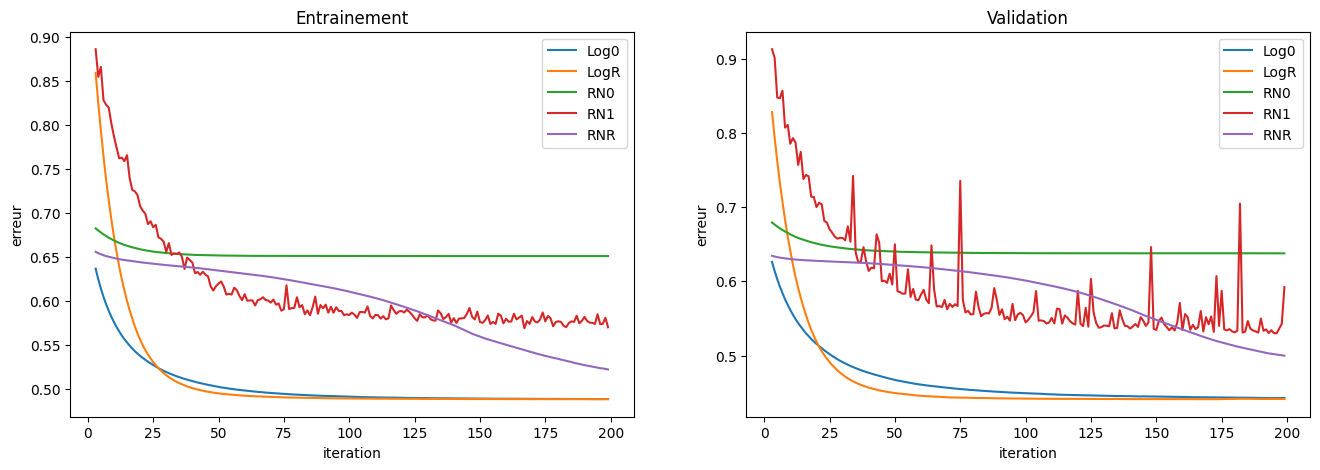

In [13]:
import logging, os
logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
from tensorflow              import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential, Model

alpha  = 0.01
NBR_IT = 200

M, N = X_train.shape

# ==================================
# Définition des modèles
# ==================================

modeles = {}

modeles['Log0'] = Sequential()
modeles['Log0'].add(Dense(1, activation="sigmoid", kernel_initializer='zero', bias_initializer='zeros'))

modeles['LogR'] = Sequential()
modeles['LogR'].add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))

modeles['RN0']  = Sequential()
modeles['RN0'].add(Dense(4, activation="relu", kernel_initializer='zero', bias_initializer='zeros'))
modeles['RN0'].add(Dense(2, activation="relu", kernel_initializer='zero', bias_initializer='zeros'))
modeles['RN0'].add(Dense(1, activation="sigmoid", kernel_initializer='zero', bias_initializer='zeros'))

modeles['RN1']  = Sequential()
modeles['RN1'].add(Dense(4, activation="relu", kernel_initializer='one', bias_initializer='one'))
modeles['RN1'].add(Dense(2, activation="relu", kernel_initializer='one', bias_initializer='one'))
modeles['RN1'].add(Dense(1, activation="sigmoid", kernel_initializer='one', bias_initializer='one'))

modeles['RNR']  = Sequential()
modeles['RNR'].add(Dense(4, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
modeles['RNR'].add(Dense(2, activation="relu", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
modeles['RNR'].add(Dense(1, activation="sigmoid", kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))

# ==================================
# Entrainement des modèles
# ==================================

# on n'affiche pas les 3 premières itérations, le temps que le modèle se stabilise
# sinon, un modèle peut avoir une grande valeur par rapport aux autres 
# donc, on ne peut pas visualiser la convergence des autres
IT_range = range(NBR_IT)[3:]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))


for nom, modele in modeles.items():
    modele.compile(loss      = tf.keras.losses.binary_crossentropy,
                 optimizer = tf.keras.optimizers.SGD(learning_rate=alpha))
    print(nom, ': Entrainement ...')
    results = modele.fit(X_trains, Y_train, epochs=NBR_IT, validation_data=(X_tests, Y_test), verbose=0)
    
    # ===========================
    # PREPARATION DE L'AFFICHAGE
    # ===========================
    ax1.plot(IT_range, results.history["loss"    ][3:], label=nom)
    ax2.plot(IT_range, results.history["val_loss"][3:], label=nom)

# ==================================
# Affichage 
# ==================================

ax1.title.set_text("Entrainement")
ax2.title.set_text("Validation")

ax1.set(xlabel='iteration', ylabel='erreur')
ax2.set(xlabel='iteration', ylabel='erreur')

ax1.legend()
ax2.legend()
plt.show()

**TODO: Analyser les résultats**
- Nous remarquons que les modèles avec un seul neurone sont plus rapides que les modèles de réseau de neurones (en terme des itérations et en terme de temps). Pourquoi ?
- Nous remarquons que **RN0** ne s'améliore pas (il stagne dès les premières itérations). Expliquer pourquoi.
- Nous remarquons que **RN1** s'améliore par rapport à **RN0**, mais il stagne rapidement par rapport **RNR**. Expliquer pourquoi.
- En se basant sur la validation, quelle est le rapport entre le nombre des couches, la complexité du problème, le nombre/qualité des données et les problèmes d'apprentissage (sous/sur). Mentionner toutes les combinaisons qui peuvent causer des problèmes.

*Réponse**
- ... Car y a beaucoup moins de complexité du fait que par exemple il y a pas de rétropropagation, de plus cette couche contient un seul noeud ce qui diminue le nombre de paramètres à ajuster par rapport aux autres modèles où il y a 3 couches contenant chacune au minimum un seul noeud et donc beaucoup plus de paramètres à modifier et à rétropropager.
- ... Car l'initialisation avec Zero cause la disparition des $\delta$ lors de la retropropagation donc la mise à jour des poids ne se fait pas et donc le modèle ne s'améliore pas même si on augmente le nombre d'itérations.
- ... Si on initialise avec des Uns, la mise à jour des $\delta$ va se faire, ce qui explique la meilleure performance de RN1 par rapport à RN0. En revanche, l'initialisation à des constantes n'est souvent pas une bonne pratique car provoque le problème de symétrie qui fait que tous les neurones des couches cachées vont apprendre la même chose et donc on aura pas de diversité dans les poids et on aura de redondance dans les neurones ce qui fait que le modèle aura une capacité de généralisation et représentaion très faible donc il ne s'améliore pas beaucoup par rapport à RNR qui initilialise aléatoirement suivant une loi uniforme introduisant ainsi une diversité dans les poids initiaux et permettant une meilleure convergence et un apprentissage plus efficace. L'initialisation "glorot_uniform" est une méthode populaire qui adapte les distributions aléatoires en fonction du nombre de neurones en entrée et en sortie d'une couche, ce qui permet de mieux contrôler la variance des poids et favorise une meilleure convergence.
- ... 
    1. Nombre de couches:
        - Pour des problèmes simples, l'utilisation d'un trop grand nombre de couches peut conduire à un sur-apprentissage, mémorisant les données d'entraînement sans généraliser à des exemples inédits.
        - Si on a un nombre de couches trop faible, le modèle ne pourra pas apprendre des représentations complexes et donc ne pourra pas généraliser correctement et aura un problème de sous-apprentissage.
    2. Complexité du problème:
        - Les problèmes complexes avec des relations non linéaires et une dimensionnalité élevée nécessitent des modèles plus puissants (potentiellement plus de couches) pour apprendre efficacement.
        - Les problèmes simples pourraient ne pas bénéficier de couches supplémentaires et pourraient souffrir d'un sur-apprentissage avec des modèles complexes.
    3. Nombre des données:
        - Plus de données permettent généralement d'entraîner efficacement des modèles plus complexes et réduire le risque de sur-apprentissage.
        - Avec des données limitées, l'utilisation de moins de couches et de modèles plus simples permet d'éviter le sous-apprentissage.
    4. Qualité des données:
        - Les données bruyantes peuvent entraîner des problèmes d'entraînement pour n'importe quel modèle.
        - Les données propres et bien étiquetées peuvent permettre d'entraîner des modèles plus complexes, conduisent à un meilleur entraînement et réduisent le risque de sur-apprentissage.
    
    ### En conclusion, on peut dire que:

    **Peu de couches + problème complexe + données limitées** : risque de sous-apprentissage.

    **Plusieurs couches + problème simple + données limitées** : risque de sur-apprentissage.
    
    **Tout modèle + données bruyantes** : peut rencontrer des problèmes d'entraînement quels que soient d'autres facteurs.


relu->sigm : Entrainement ...
sigm->sigm : Entrainement ...
tanh->sigm : Entrainement ...
sigm->relu : Entrainement ...
relu->relu : Entrainement ...


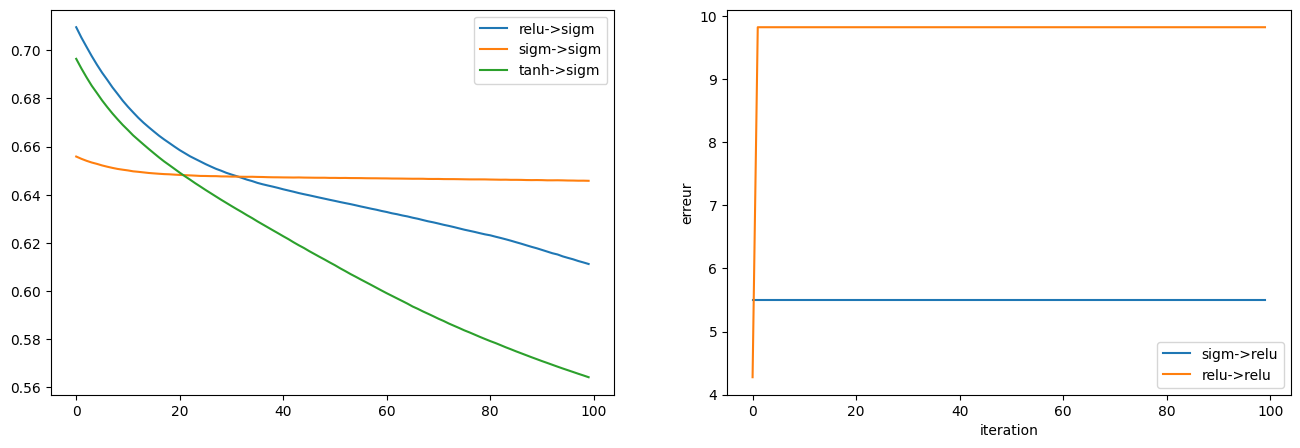

In [14]:
alpha  = 0.01
NBR_IT = 100

M, N = X_train.shape

L1 = 2 # Nombre des neurones dans la couche 1
L2 = 2 # Nombre des neurones dans la couche 2

# ==================================
# Définition des modèles
# ==================================

defs = [ # Les définitions
    ('relu->sigm', 'relu', 'sigmoid'),
    ('sigm->sigm', 'sigmoid', 'sigmoid'),
    ('tanh->sigm', 'tanh', 'sigmoid'),
    ('sigm->relu', 'sigmoid', 'relu'),
    ('relu->relu', 'relu', 'relu')
]

modeles = {}
params = {'kernel_initializer':'glorot_uniform', 'bias_initializer':'glorot_uniform'}

for nom, in_act, out_act in defs:
    modeles[nom] = Sequential()
    modeles[nom].add(Dense(L1, activation = in_act , **params))
    modeles[nom].add(Dense(L2, activation = in_act , **params))
    modeles[nom].add(Dense(1,  activation = out_act, **params))

# ==================================
# Entrainement des modèles
# ==================================

results = {}

for nom, modele in modeles.items():
    modele.compile(loss      = tf.keras.losses.binary_crossentropy,
                 optimizer = tf.keras.optimizers.SGD(learning_rate=alpha))
    print(nom, ': Entrainement ...')
    results[nom] = modele.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)
    

# ==================================
# Affichage 
# ==================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

for nom, result in results.items():
    ax = ax1 if nom.endswith('sigm') else ax2
    ax.plot(range(NBR_IT), result.history['loss'], label=nom)
    
ax1.legend()
ax2.legend()
plt.xlabel("iteration")
plt.ylabel("erreur")
plt.legend()
plt.show()

**TODO: Analyser les résultats**
- Nous remarquons que le modèle **sigmoid->sigmoid** a stagné rapidement. Expliquer comment ?
- Nous remarquons que ce modèle a convergé plus rapidement (en terme de nombre des itérations) par rapport aux deux modèles avec sortie **sigmoid**. Pourquoi ?
- Nous remarquons que les modèles avec sortie **relu** ne sont pas stables ; à chaque exécution, nous aurons un diagramme différent (des fois amélioration, des fois détérioration, etc.). Il faut noter que l'initialisation aléatoire n'est pas la source du problème vu qu'il y a d'autres modèles similaires mais stables. Donc, pourquoi nous avons eu ce comportement ?

**Réponse**
- ... Car la dérivée de la fonction sigmoid est maximale au centre et tend vers 0 aux extrémités, ce qui fait que le gradient est très faible aux extrémités et donc on aura le problème de disparition des gradients et donc la mise à jour des poids ne se fait pas bien et donc le modèle ne s'améliore pas même si on augmente le nombre d'itérations.
- ... Car la fonction d'activation sigmoid possède un gradient inférieur (ne dépassant pas 0.25) aux gradients des deux autres restants (qui peuvent atteindre 1), donc le pas de convergence avec sigmoid sera dans la plupart des cas très petit comparé aux deux autres ce qui va engendrer une stagnation (convergence) plus rapide.
- ... Car pour la fonction Relu le gradient peut être très grand (1) ou très petit (0) selon la valeur de l'entrée (positive ou négative respectivement), et dans le cas où Relu est utilisée dans la couche de sortie, le gradient de la fonction de coût par rapport à l'entrée de Relu peut être très grand ou très petit, ce qui peut entraîner des oscillations dans les valeurs des poids de toutes les couches du réseau, et donc une instabilité dans la convergence du modèle.

GD : entrainement ...
Adagrad : entrainement ...
RMSprop : entrainement ...
Adam : entrainement ...


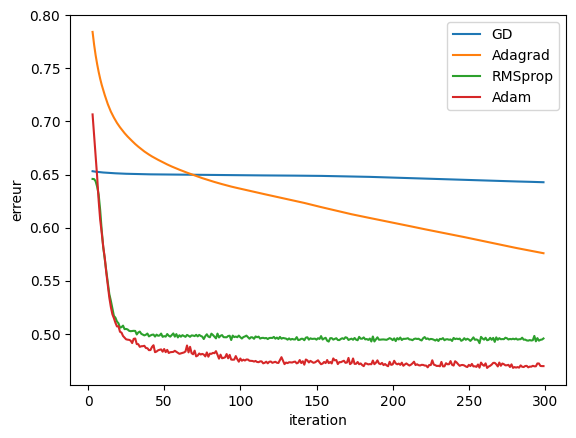

In [15]:
alpha  = 0.01
NBR_IT = 300

M, N = X_train.shape

L1 = 2
L2 = 2

# on n'affiche pas les 3 premières itérations, le temps que le modèle se stabilise
# sinon, un modèle peut avoir une grande valeur par rapport aux autres 
# donc, on ne peut pas visualiser la convergence des autres
IT_range = range(NBR_IT)[3:]

defs = [ # Les définitions
    ('GD'     , tf.keras.optimizers.SGD    (learning_rate=alpha)),
    ('Adagrad', tf.keras.optimizers.Adagrad(learning_rate=alpha)),
    ('RMSprop', tf.keras.optimizers.RMSprop(learning_rate=alpha)),
    ('Adam'   , tf.keras.optimizers.Adam   (learning_rate=alpha))
]

params = {'kernel_initializer':'glorot_uniform', 'bias_initializer':'glorot_uniform'}

for nom, opt in defs:
    modele = Sequential()
    modele.add(Dense(L1, activation="relu"   , **params))
    modele.add(Dense(L2, activation="relu"   , **params))
    modele.add(Dense(1,  activation="sigmoid", **params))
    modele.compile(loss      = tf.keras.losses.binary_crossentropy,
                   optimizer = opt)
    
    print(nom, ': entrainement ...')
    results = modele.fit(X_trains, Y_train, epochs=NBR_IT, verbose=0)
    plt.plot(IT_range, results.history["loss"][3:], label=nom)


plt.xlabel("iteration")
plt.ylabel("erreur")
plt.legend()
plt.show()

**Analyser les résultats**
- Nous remarquons que le modèle **GD** converge plus vite que **AdaGrad**. Pourquoi ?
- Pourquoi **RMSprop** converge plus vite que **AdaGrad**, pourtant leurs equations sont presque similaire ? (ici, vous devez expliquer l'apport dans l'equation du premier par rapport au deuxième)
- En exécutant ce code plusieurs fois, nous remarquons que Adam est plus stable. Pourquoi ?

**Réponse**
- ... Ceci est dû au problème de "Learning Rate Decay" dans AdaGrad, qui fait que le pas de convergence diminue au fur et à mesure des itérations. C'est causé par le fait que le pas de convergence est calculé en divisant le pas initial par la racine carrée de la somme des carrés des gradients précédents, et puisque nous sommes en train d'utiliser Relu comme fonction d'activation, le gradient peut être très grand (1) 50% du temps, ce qui fait que la somme des carrés des gradients précédents augmente très rapidement et donc le pas de convergence diminue très rapidement. Donc ça peut causer une convergence très lente.
- ... RMSprop modifie l'approche d'AdaGrad en introduisant une forme d'oubli exponentiel. Au lieu d'accumuler tous les carrés des gradients passés de manière cumulative comme AdaGrad, RMSprop utilise une moyenne pondérée exponentielle des gradients antérieurs en utilisant une fonction d'estimation. Cela permet à RMSprop de donner moins de poids aux gradients anciens par rapport aux gradients plus récents. Ainsi, les gradients anciens influencent moins le taux d'apprentissage actuel, évitant ainsi une réduction trop agressive du taux d'apprentissage, donc assurant une convergence plus rapide.
- ... Adam combine les avantages de RMSprop (utilisation d'une estimation adaptative du taux d'apprentissage basée sur les moments du gradient) et de la méthode du moment (utilisation d'un terme de momentum pour accélérer l'apprentissage dans la direction appropriée) et en plus Adam estime et corrige le biais dans les premières et deuxièmes estimations de moment (gradients moyens et gradients carrés moyens) en utilisant des moyennes mobiles exponentielles avec des taux de décroissance. 
Cette combinaison permet à Adam d'avoir un momentum précis et d'adapter le taux d'apprentissage de manière plus souple par rapport aux autres optimiseurs, ce qui peut l'aider à converger plus rapidement tout en maintenant une stabilité relative. AdaGrad et RMSprop ne disposent pas de ce mécanisme, ce qui entraîne potentiellement une instabilité.
Le terme de momentum utilisé dans Adam permet de "lisser" les mises à jour des gradients. Cela peut aider à éviter les oscillations brusques et à stabiliser l'apprentissage, en particulier dans des régions de l'espace de paramètres où d'autres optimiseurs pourraient être plus sensibles à des variations importantes des gradients calculées.